# **Data Exploration and Cohort Analysis for Diabetes Health Indicator Dataset (Adapted from BRFSS Dataset)**



## **The Basic Information about this Dataset**

### **Dataset Information:**

Diabetes is a prevalent chronic disease in the United States, impacting millions annually and posing significant health and economic burdens. The Behavioral Risk Factor Surveillance System (BRFSS) collects health-related data annually, including information on risk behaviors, chronic conditions, and preventive services. This dataset, derived from the 2015 BRFSS, comprises three CSV files.

1. **diabetes_012_health_indicators_BRFSS2015.csv**:
   - Contain 253,680 survey responses.
   - Target variable: Diabetes_012, with 3 classes (0: no diabetes or only during pregnancy, 1: prediabetes, 2: diabetes).
   - Class imbalance exists.
   - Features: 21 variables.

2. **diabetes_binary_5050split_health_indicators_BRFSS2015.csv**:
   - Includes 70,692 survey responses.
   - Balanced 50-50 split between respondents with no diabetes and those with prediabetes or diabetes.
   - Target variable: Diabetes_binary, with 2 classes (0: no diabetes, 1: prediabetes or diabetes).
   - Features: 21 variables.

3. **diabetes_binary_health_indicators_BRFSS2015.csv**:
   - Contains 253,680 survey responses.
   - Target variable: Diabetes_binary, with 2 classes (0: no diabetes, 1: prediabetes or diabetes).
   - Class imbalance exists.
   - Features: 21 variables.

Research questions that can be explored using this dataset include:
- Assessing the accuracy of BRFSS survey questions in predicting diabetes.
- Identifying the most predictive risk factors for diabetes.
- Evaluating the feasibility of using a subset of risk factors for diabetes prediction.
- Investigating feature selection to create a concise set of questions for diabetes risk prediction.

This dataset serves as a valuable resource for developing predictive models, understanding diabetes risk factors, and informing public health interventions. It is derived from the BRFSS 2015 dataset, with cleaning and consolidation performed by the creator, inspired by previous work on diabetes risk prediction using machine learning techniques.


In [24]:
import matplotlib.pyplot as plt
import numpy as np 
import os
import pandas as pd
import seaborn as sns

file_path = 'diabetes_012_health_indicators_BRFSS2015.csv'
health_indicators = pd.read_csv(file_path)



<class 'pandas.core.frame.DataFrame'>


In [14]:
health_indicators.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [25]:
# Attributes Names
print(health_indicators.columns)

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


### **Health Indicators Dataset - Attribute Descriptions**

The dataset contains the following attributes related to the health indicators of individuals:

- `Diabetes_012`: Categorical variable for diabetes status.
  - `0`: No diabetes or diabetes during pregnancy.
  - `1`: Prediabetes.
  - `2`: Diabetes.
  
- `HighBP`: High blood pressure status.
  - `1`: High blood pressure.
  - `0`: Normal blood pressure.
  
- `HighChol`: High cholesterol status.
  - `1`: High cholesterol.
  - `0`: Normal cholesterol.
  
- `CholCheck`: Cholesterol check status.
  - `1`: Cholesterol has been checked in the last 5 years.
  - `0`: Cholesterol has not been checked in the last 5 years.
  
- `BMI`: Body Mass Index, a numerical value of weight in relation to height.
  
- `Smoker`: Smoking status.
  - `1`: Current smoker.
  - `0`: Non-smoker.
  
- `Stroke`: Stroke occurrence.
  - `1`: Has had a stroke.
  - `0`: Has never had a stroke.
  
- `HeartDiseaseorAttack`: Heart disease or heart attack occurrence.
  - `1`: Has had heart disease or a heart attack.
  - `0`: Has not had heart disease or a heart attack.
  
- `PhysActivity`: Physical activity status.
  - `1`: Engages in physical activity.
  - `0`: Does not engage in physical activity.
  
- `Fruits`: Fruit consumption status.
  - `1`: Regularly eats fruits.
  - `0`: Does not regularly eat fruits.
  
- `Veggies`: Vegetable consumption status.
  - `1`: Regularly eats vegetables.
  - `0`: Does not regularly eat vegetables.
  
- `HvyAlcoholConsump`: Heavy alcohol consumption status.
  - `1`: Heavy alcohol consumer.
  - `0`: Not a heavy alcohol consumer.

- `AnyHealthcare`: Healthcare coverage status.
  - `1`: Has healthcare coverage.
  - `0`: Does not have healthcare coverage.
  
- `NoDocbcCost`: Lack of doctor's visit due to cost.
  - `1`: Cost has prevented visiting a doctor.
  - `0`: Cost has not prevented visiting a doctor.
  
- `GenHlth`: General health status, usually on a Likert scale.
  - Typically a numerical score indicating perceived health status.
  
- `MentHlth`: Mental health status.
  - Numerical value representing the number of days with poor mental health.
  
- `PhysHlth`: Physical health status.
  - Numerical value representing the number of days with poor physical health.
  
- `DiffWalk`: Difficulty walking status.
  - `1`: Has difficulty walking.
  - `0`: Does not have difficulty walking.
  
- `Sex`: Gender.
  - `1`: Male.
  - `0`: Female.
  
- `Age`: Age group, encoded as a numerical value representing an age category.

- `Education`: Highest level of education attained, encoded numerically.

- `Income`: Income level, encoded as a numerical value that categorizes the respondent's income bracket.

### **Target Attribute: `Diabetes_012` for Classification**

In predictive modeling, specifically in healthcare datasets, classifying individuals based on health conditions like diabetes is essential for both clinical decision-making and public health management. `Diabetes_012` is particularly well-suited as a target attribute for classification due to its categorical nature, representing different states of diabetes:

1. **Classification Objective:** The primary aim is to classify individuals into one of three categories:
   - `0`: No diabetes or diabetes during pregnancy.
   - `1`: Prediabetes.
   - `2`: Diabetes.
   This classification helps in identifying individuals at various stages of diabetes progression, which is crucial for timely intervention and management.

2. **Methodology:** Classification algorithms are ideal for this task because they can effectively distinguish between multiple classes based on input features. Suitable algorithms might include:
   - **Logistic Regression:** Though typically used for binary outcomes, logistic regression can be extended to multinomial logistic regression for multi-class problems.
   - **Decision Trees and Random Forests:** These methods are capable of handling multiple classes and can provide insights into the importance of different predictors.
   - **Gradient Boosting Machines (GBM):** GBMs are robust classifiers that can optimize prediction accuracy by combining multiple weak predictors into a strong one.
   - **Neural Networks:** For large datasets with complex patterns, neural networks can model non-linear relationships effectively.

3. **Public Health Impact:** Classifying individuals by their diabetes status can direct healthcare resources more efficiently. It enables healthcare providers to prioritize interventions for those identified as prediabetic or diabetic, potentially delaying or preventing the onset of severe diabetes complications.

4. **Data-Driven Interventions:** By accurately classifying individuals, interventions can be better tailored to each group's specific needs. For example, prediabetics might receive dietary counseling and recommendations for physical activity to prevent progression to full-blown diabetes.

5. **Policy Formulation:** Insights from classification models can inform public health policies and programs, like screening for diabetes and prediabetes in vulnerable populations, thereby implementing preventive measures on a larger scale.

Overall, using `Diabetes_012` as a classification target leverages the predictive power of machine learning to address a critical health issue, enabling targeted healthcare interventions and supporting broader public health objectives.




## **Data Exploration**

C:\Users\Tianyi Zhang\AppData\Local\Temp\ipykernel_27140\3535590955.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=diabetes_counts.index, y=diabetes_counts.values, palette="Set2")


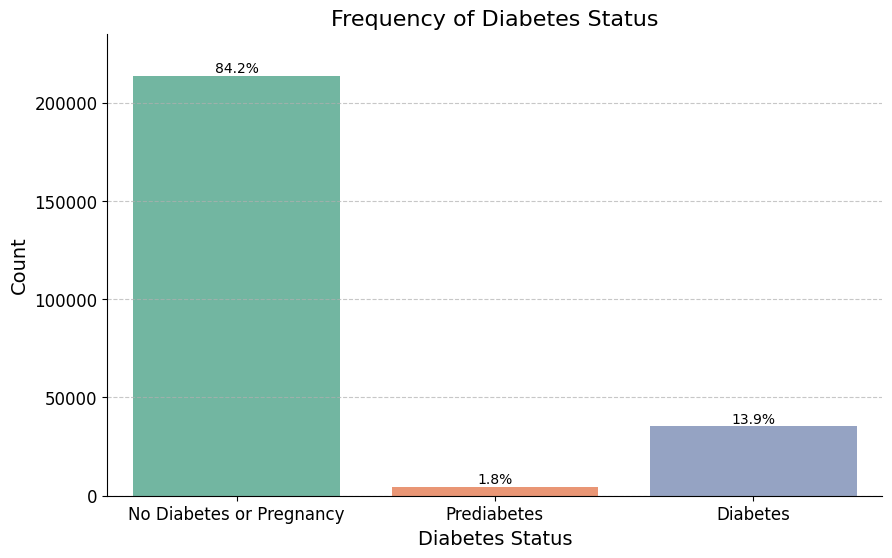

In [26]:
# Calculate counts for each category in 'Diabetes_012'
diabetes_counts = health_indicators['Diabetes_012'].value_counts().sort_index()

# Calculate proportions
total_count = diabetes_counts.sum()
proportions = diabetes_counts / total_count * 100

# Start plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=diabetes_counts.index, y=diabetes_counts.values, palette="Set2")

# Annotate each bar with the proportion value
for i, (count, proportion) in enumerate(zip(diabetes_counts.values, proportions)):
    ax.text(i, count, f'{proportion:.1f}%', ha='center', va='bottom')

# Set plot labels and titles
plt.title('Frequency of Diabetes Status', fontsize=16)
plt.xlabel('Diabetes Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(ticks=[0, 1, 2], labels=['No Diabetes or Pregnancy', 'Prediabetes', 'Diabetes'], fontsize=12)
plt.yticks(fontsize=12)

# Improve the y-axis scale for better visual representation of the count
max_count = diabetes_counts.max()
plt.ylim(0, max_count + (max_count * 0.1))  # add 10% headroom for the annotation

plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()

# Show the plot
plt.show()

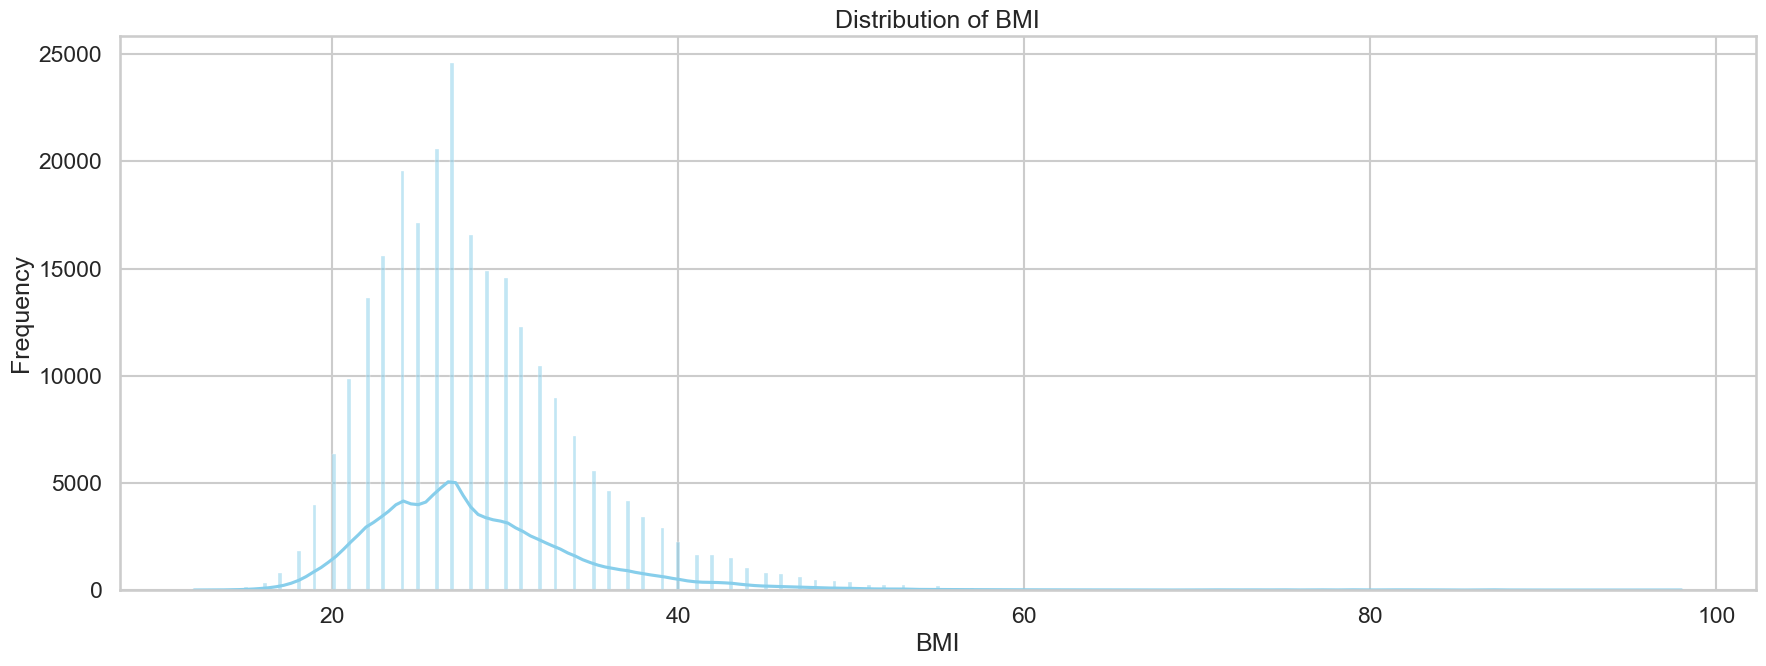

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting up the aesthetics for the plots
sns.set_style('whitegrid')
sns.set_context('talk')

# Assuming 'health_indicators' is your DataFrame and has columns 'BMI' and 'Age'
plt.figure(figsize=(18, 7))  # Adjust the figure size so it's wider and provides more space

# Plot for Distribution of BMI
sns.histplot(health_indicators['BMI'], kde=True, color='skyblue')
plt.title("Distribution of BMI")
plt.xlabel("BMI")
plt.ylabel("Frequency")

plt.tight_layout()  # Adjust the subplots to fit into the figure area.
plt.show()


C:\Users\Tianyi Zhang\AppData\Local\Temp\ipykernel_27140\1093358316.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(subcohorts_counts.keys()), y=list(subcohorts_counts.values()), palette="viridis")


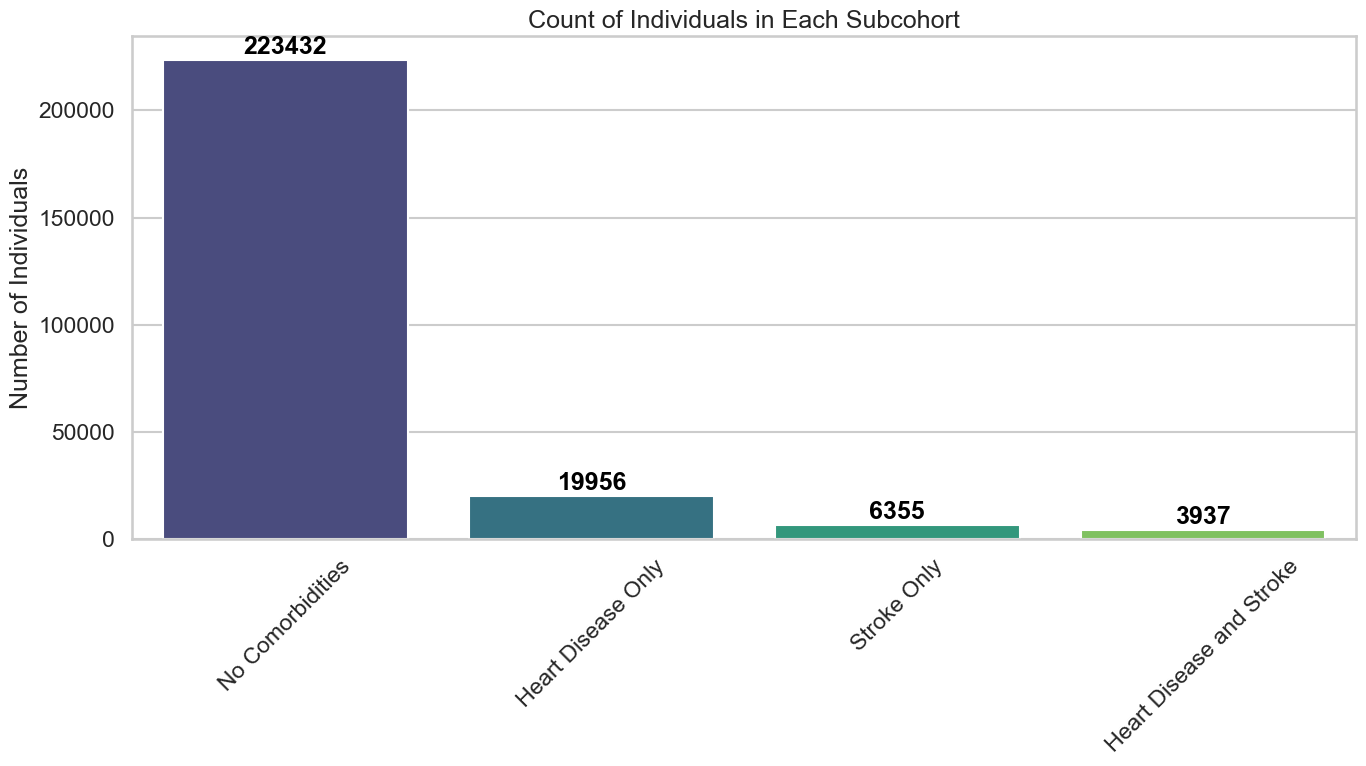

In [36]:
conditions = {
    'No Comorbidities': (health_indicators['HeartDiseaseorAttack'] == 0) & (health_indicators['Stroke'] == 0),
    'Heart Disease Only': (health_indicators['HeartDiseaseorAttack'] == 1) & (health_indicators['Stroke'] == 0),
    'Stroke Only': (health_indicators['HeartDiseaseorAttack'] == 0) & (health_indicators['Stroke'] == 1),
    'Heart Disease and Stroke': (health_indicators['HeartDiseaseorAttack'] == 1) & (health_indicators['Stroke'] == 1),
}

# Calculate the count of individuals in each subcohort, excluding Diabetes status
subcohorts_counts = {key: len(health_indicators[condition]) for key, condition in conditions.items()}

# Improve the plot appearance and size
plt.figure(figsize=(14, 8))  # Larger figure size
ax = sns.barplot(x=list(subcohorts_counts.keys()), y=list(subcohorts_counts.values()), palette="viridis")
plt.xticks(rotation=45)  # Rotate the labels to prevent overlap
plt.ylabel('Number of Individuals')
plt.title('Count of Individuals in Each Subcohort')

# Adding the text labels on top of the bars
for i, value in enumerate(list(subcohorts_counts.values())):
    ax.text(i, value + 500, str(value), ha='center', va='bottom', color='black', fontweight='bold')

plt.tight_layout()
plt.show()

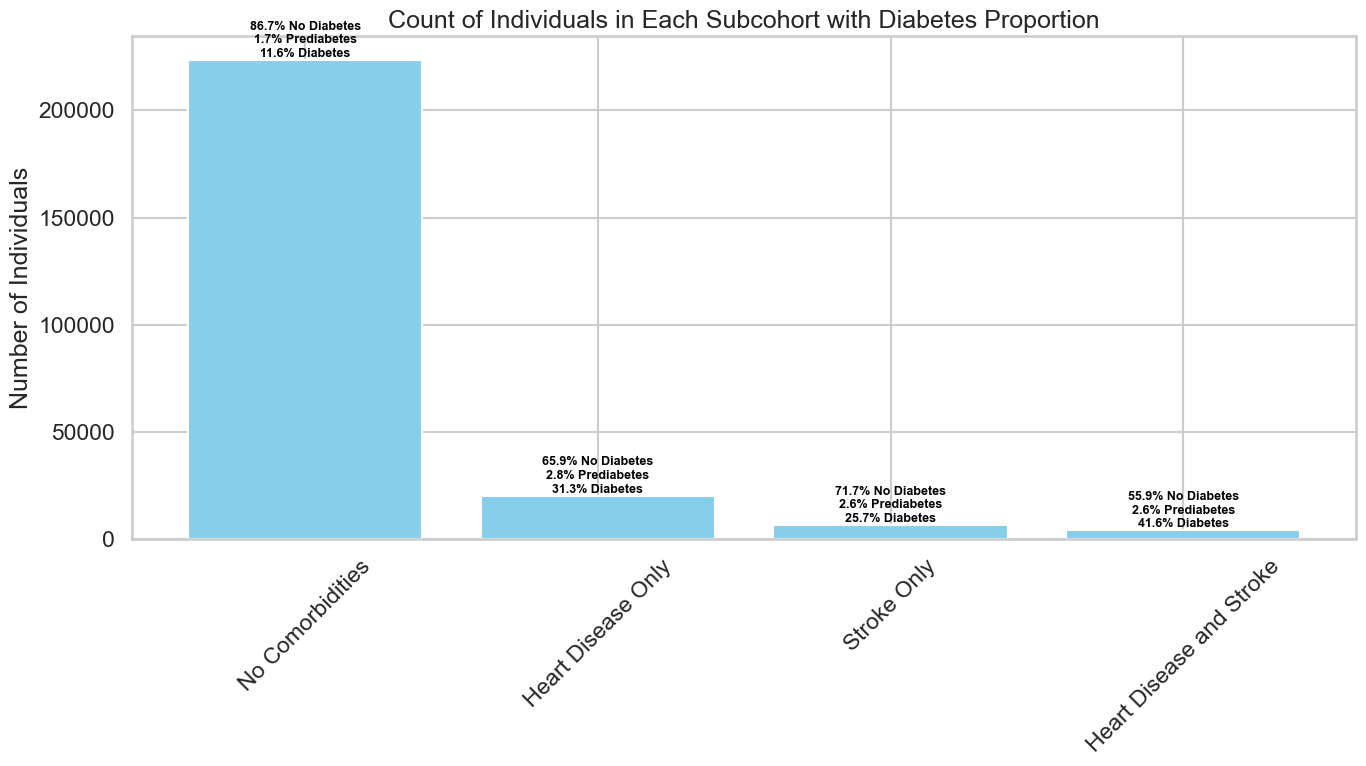

In [53]:
# Define conditions for comorbidity groups
conditions = {
    'No Comorbidities': (health_indicators['HeartDiseaseorAttack'] == 0) & (health_indicators['Stroke'] == 0),
    'Heart Disease Only': (health_indicators['HeartDiseaseorAttack'] == 1) & (health_indicators['Stroke'] == 0),
    'Stroke Only': (health_indicators['HeartDiseaseorAttack'] == 0) & (health_indicators['Stroke'] == 1),
    'Heart Disease and Stroke': (health_indicators['HeartDiseaseorAttack'] == 1) & (health_indicators['Stroke'] == 1),
}

# Calculate the count of individuals in each subcohort
subcohorts = {key: health_indicators[condition] for key, condition in conditions.items()}
subcohorts_counts = {key: len(value) for key, value in subcohorts.items()}

# Calculate the proportion of Diabetes status within each subcohort
subcohorts_diabetes_proportions = {key: value['Diabetes_012'].value_counts(normalize=True) * 100 for key, value in subcohorts.items()}

# Plotting
plt.figure(figsize=(14, 8))  # Larger figure size
bars = plt.bar(subcohorts_counts.keys(), subcohorts_counts.values(), color='skyblue')

# Annotate proportions of diabetes status within each group
for i, bar in enumerate(bars):
    subcohort = list(subcohorts_counts.keys())[i]
    no_diabetes = subcohorts_diabetes_proportions[subcohort].get(0, 0)
    prediabetes = subcohorts_diabetes_proportions[subcohort].get(1, 0)
    diabetes = subcohorts_diabetes_proportions[subcohort].get(2, 0)
    
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             f'{no_diabetes:.1f}% No Diabetes\n{prediabetes:.1f}% Prediabetes\n{diabetes:.1f}% Diabetes', 
             ha='center', va='bottom', color='black', fontweight='bold', fontsize=9)

plt.xticks(rotation=45)  # Rotate the labels to prevent overlap
plt.ylabel('Number of Individuals')
plt.title('Count of Individuals in Each Subcohort with Diabetes Proportion')

plt.tight_layout()
plt.show()

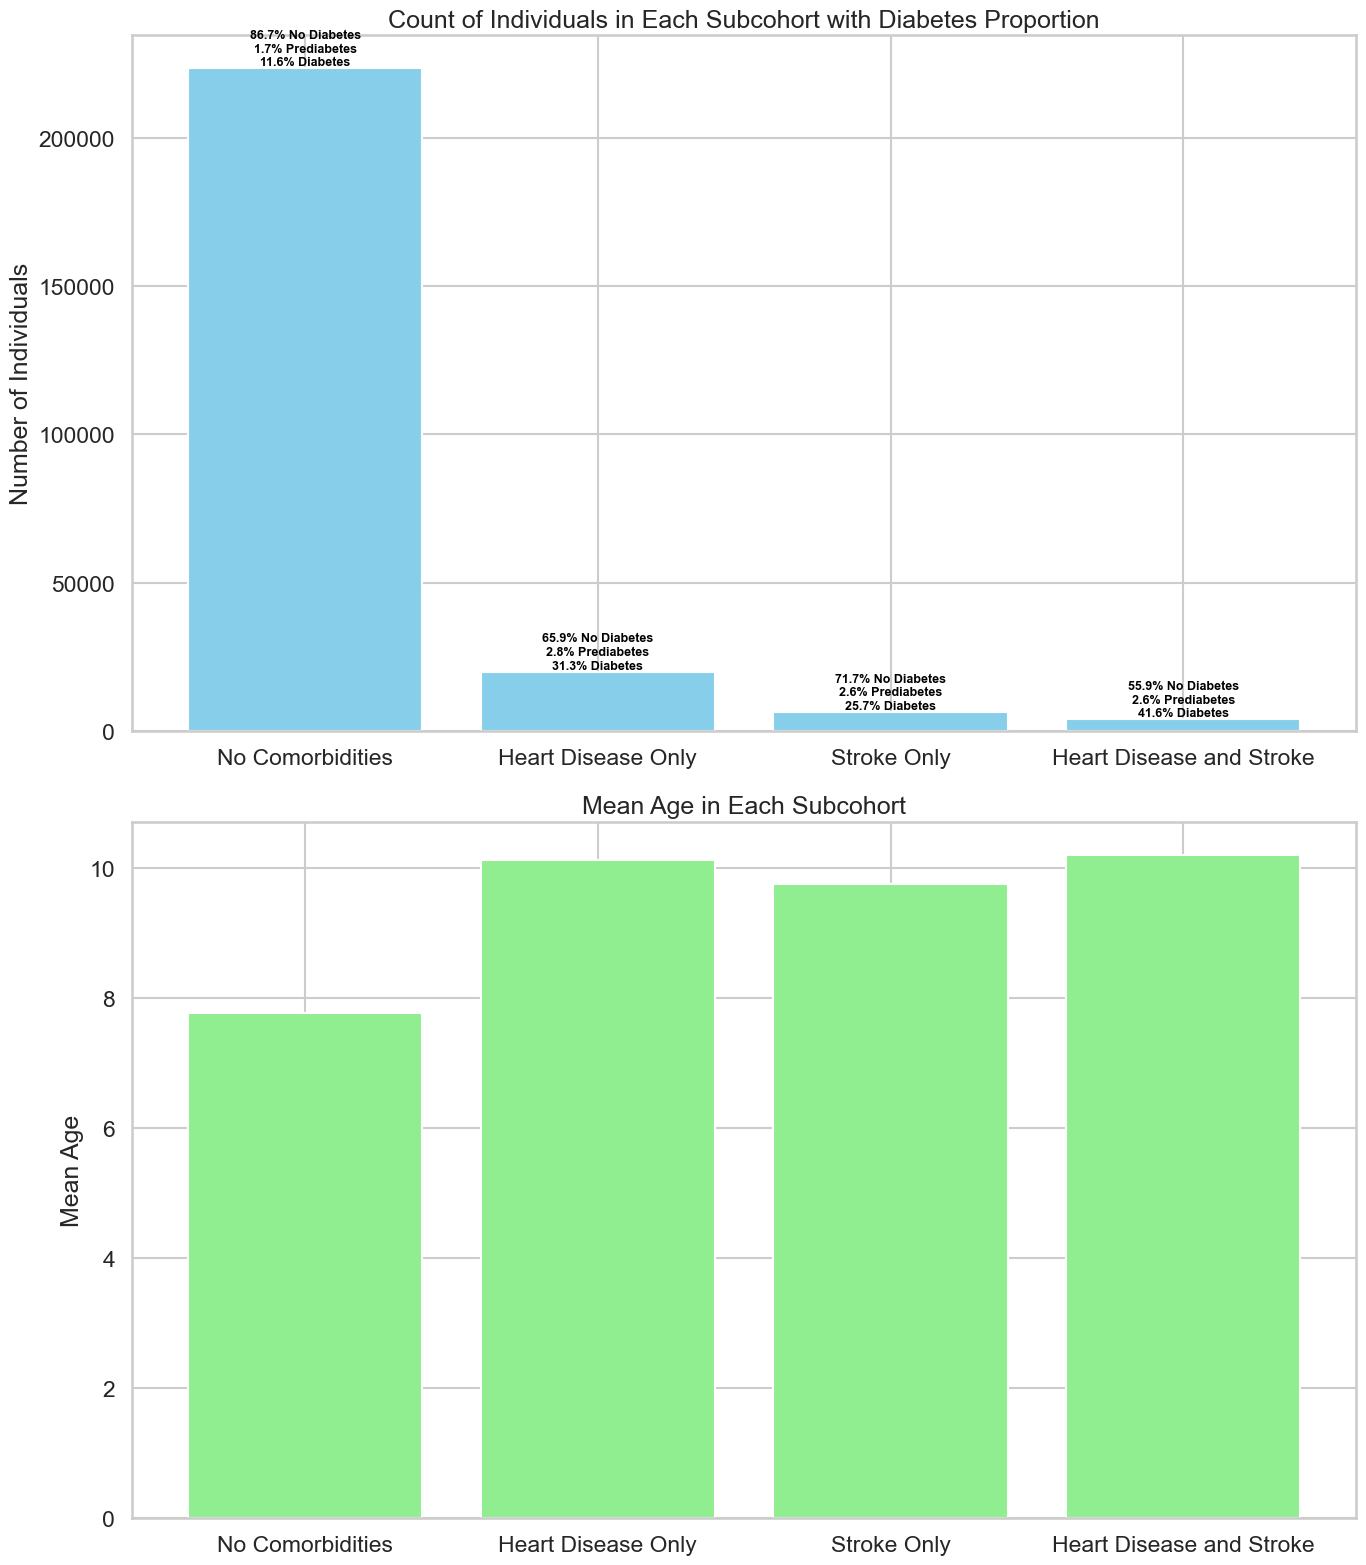


Sex distribution in No Comorbidities:
0.0    57.294389
1.0    42.705611
Name: Sex, dtype: float64

Sex distribution in Heart Disease Only:
1.0    58.538785
0.0    41.461215
Name: Sex, dtype: float64

Sex distribution in Stroke Only:
0.0    59.087333
1.0    40.912667
Name: Sex, dtype: float64

Sex distribution in Heart Disease and Stroke:
1.0    50.952502
0.0    49.047498
Name: Sex, dtype: float64


In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Define conditions for comorbidity groups
conditions = {
    'No Comorbidities': (health_indicators['HeartDiseaseorAttack'] == 0) & (health_indicators['Stroke'] == 0),
    'Heart Disease Only': (health_indicators['HeartDiseaseorAttack'] == 1) & (health_indicators['Stroke'] == 0),
    'Stroke Only': (health_indicators['HeartDiseaseorAttack'] == 0) & (health_indicators['Stroke'] == 1),
    'Heart Disease and Stroke': (health_indicators['HeartDiseaseorAttack'] == 1) & (health_indicators['Stroke'] == 1),
}

# Calculate the count of individuals in each subcohort
subcohorts = {key: health_indicators[condition] for key, condition in conditions.items()}
subcohorts_counts = {key: len(value) for key, value in subcohorts.items()}

# Calculate the proportion of Diabetes status within each subcohort
subcohorts_diabetes_proportions = {key: value['Diabetes_012'].value_counts(normalize=True) * 100 for key, value in subcohorts.items()}

# Calculate the mean age within each subcohort
subcohorts_mean_age = {key: value['Age'].mean() for key, value in subcohorts.items()}

# Calculate the distribution of Sex within each subcohort
subcohorts_sex_distribution = {key: value['Sex'].value_counts(normalize=True) * 100 for key, value in subcohorts.items()}

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 16))

# Plot count of individuals and diabetes proportion
bars = axes[0].bar(subcohorts_counts.keys(), subcohorts_counts.values(), color='skyblue')
for i, bar in enumerate(bars):
    subcohort = list(subcohorts_counts.keys())[i]
    no_diabetes = subcohorts_diabetes_proportions[subcohort].get(0, 0)
    prediabetes = subcohorts_diabetes_proportions[subcohort].get(1, 0)
    diabetes = subcohorts_diabetes_proportions[subcohort].get(2, 0)
    axes[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
                 f'{no_diabetes:.1f}% No Diabetes\n{prediabetes:.1f}% Prediabetes\n{diabetes:.1f}% Diabetes', 
                 ha='center', va='bottom', color='black', fontweight='bold', fontsize=9)
axes[0].set_ylabel('Number of Individuals')
axes[0].set_title('Count of Individuals in Each Subcohort with Diabetes Proportion')

# Plot mean age
axes[1].bar(subcohorts_mean_age.keys(), subcohorts_mean_age.values(), color='lightgreen')
axes[1].set_ylabel('Mean Age')
axes[1].set_title('Mean Age in Each Subcohort')

plt.tight_layout()
plt.show()

# Display the distribution of Sex within each subcohort
for subcohort, distribution in subcohorts_sex_distribution.items():
    print(f"\nSex distribution in {subcohort}:")
    print(distribution)


### **Male to Female Ratio**

In [51]:
female_propotion = health_indicators["Sex"].mean()
female_propotion

0.4403421633554084

### **Mean Age for Survey Respondents**

In [38]:
mean_age = health_indicators['Age'].mean()
std_dev_age = health_indicators['Age'].std()

# Calculating the interval using the mean and standard deviation
age_interval_lower = mean_age - std_dev_age
age_interval_upper = mean_age + std_dev_age

mean_age, std_dev_age, age_interval_lower, age_interval_upper

(8.032119205298013, 3.054220434168484, 4.977898771129529, 11.086339639466498)

The `Age` variable, categorized into 13 levels, shows an average category at 8.03, closely aligning with the 60-64 age range. With a standard deviation of 3.05, the age distribution of respondents primarily spans from the 40-44 to the 70-74 age groups. This demographic spread is crucial for tailoring health-related analyses and interventions aimed at addressing the needs of middle-aged to older adults.

- Category 1: Ages 18-24
- Category 2: Ages 25-29
- Category 3: Ages 30-34
- Category 4: Ages 35-39
- Category 5: Ages 40-44
- Category 6: Ages 45-49
- Category 7: Ages 50-54
- Category 8: Ages 55-59
- Category 9: Ages 60-64
- Category 10: Ages 65-69
- Category 11: Ages 70-74
- Category 12: Ages 75-79
- Category 13: Age 80 or older



In [48]:
actual_mean_age = mean_age/(64-55)*64

actual_interval_lower = age_interval_lower/(44-35)*44
actual_interval_lower

actual_interval_upper = age_interval_upper/(79-70)*79


print(f"Mean Age: {actual_mean_age:.2f}")
print(f"Age Interval: {actual_interval_lower:.2f} to {actual_interval_upper:.2f}")

actual_mean_age - actual_interval_lower

Mean Age: 57.12
Age Interval: 24.34 to 97.31


32.78089813437484